### Decision Tree Regression

In [138]:
# import numpy package for arrays and stuff 
import numpy as np  
  
# import matplotlib.pyplot for plotting our result 
import matplotlib.pyplot as plt 
  
# import pandas for importing csv files  
import pandas as pd 

In [139]:
# import dataset 
dataset = pd.read_csv('material_data.txt')  
# alternatively open up .csv file to read data 

In [140]:
dataset.head()

,Elements,Atomic_Number,Electronegativity,Atomic_Radius,Thermal_Conductivity,Density,Crystal_System
0,H,1,2.20,0.25,0.1805,0.09,HEX
1,He,2,0.00,1.20,0.1513,0.18,HCP
2,Li,3,0.98,1.45,85.0000,530.00,BCC
3,Be,4,1.57,1.05,190.0000,1850.00,HCP
4,B,5,2.04,0.85,27.0000,2340.00,RHO


### In the above dataset, I would like to predict Thermal Conductivity based on Electronegatviity, Atomic Radius and Density.

In [141]:
X = dataset[['Electronegativity','Atomic_Radius','Density']]
#X = dataset[['Density']]

In [142]:
X

,Electronegativity,Atomic_Radius,Density
0,2.20,0.25,0.09
1,0.00,1.20,0.18
2,0.98,1.45,530.00
3,1.57,1.05,1850.00
4,2.04,0.85,2340.00
...,...,...,...
90,1.38,1.75,18950.00
91,1.36,1.75,20200.00
92,1.28,1.75,19840.00
93,1.30,1.75,13670.00


In [143]:
print(X)
X.dtypes

    Electronegativity  Atomic_Radius   Density
0                2.20           0.25      0.09
1                0.00           1.20      0.18
2                0.98           1.45    530.00
3                1.57           1.05   1850.00
4                2.04           0.85   2340.00
..                ...            ...       ...
90               1.38           1.75  18950.00
91               1.36           1.75  20200.00
92               1.28           1.75  19840.00
93               1.30           1.75  13670.00
94               1.30           1.76  13500.00

[95 rows x 3 columns]


Electronegativity    float64
Atomic_Radius        float64
Density              float64
dtype: object

In [144]:
Y = dataset[['Thermal_Conductivity']]

In [145]:
Y
Y.dtypes

Thermal_Conductivity    float64
dtype: object

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor = DecisionTreeRegressor()  
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.30, random_state=0)
# fit the regressor with X and Y data 
regressor.fit(X_train, Y_train) 

DecisionTreeRegressor()

In [147]:
# predicting a new value 
  
Y_train_pred = regressor.predict(X_train,check_input=True) 
Y_test_pred = regressor.predict(X_test,check_input=True) 
  
# print the predicted price 
Y_test_pred

array([1.40e+02, 8.00e+01, 1.20e+01, 9.43e-03, 2.35e+02, 1.10e+01,
       1.70e+01, 4.00e+02, 2.05e-01, 1.50e+02, 7.20e+01, 1.40e+02,
       2.40e+01, 6.00e+00, 1.00e+01, 1.30e+01, 1.40e+02, 1.20e+02,
       3.50e+01, 1.50e+02, 9.10e+01, 1.50e+02, 2.20e+01, 1.40e+02,
       4.00e+02, 8.00e+01, 4.00e+02, 1.60e+01, 3.50e+01])

In [148]:
import matplotlib.pyplot as plt

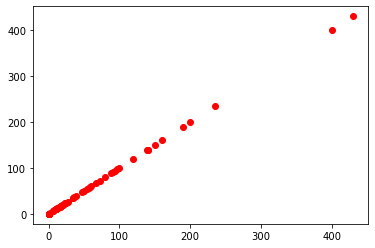

In [149]:
plt.scatter(Y_train, Y_train_pred, color = 'red')
plt.show()

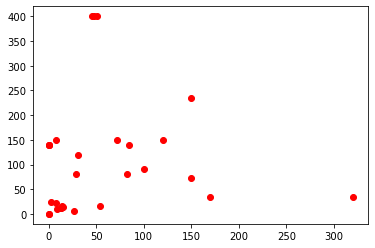

In [150]:
plt.scatter(Y_test, Y_test_pred, color = 'red')
plt.show()

In [154]:
from sklearn.ensemble import (BaggingRegressor, RandomForestRegressor, AdaBoostRegressor)
from sklearn.metrics import mean_squared_error

In [176]:
# Set the random seed, number of estimators
# and the "step factor" used to plot the graph of MSE
# for each method
random_state = 42
n_jobs = 1  # Parallelisation factor for bagging, random forests
n_estimators = 10
step_factor = 1
axis_step = int(n_estimators/step_factor)

# Pre-create the arrays which will contain the MSE for
# each particular ensemble method
estimators = np.zeros(axis_step)
bagging_mse = np.zeros(axis_step)
rf_mse = np.zeros(axis_step)
boosting_mse = np.zeros(axis_step)

# Estimate the Bagging MSE over the full number
# of estimators, across a step size ("step_factor")
for i in range(0, axis_step):
    print("Bagging Estimator: %d of %d..." % (step_factor*(i+1), n_estimators))
    bagging = BaggingRegressor(DecisionTreeRegressor(),n_estimators=step_factor*(i+1))#,random_state=random_state)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)#, random_state=0)
    bagging.fit(X_train, Y_train.values.ravel())
    mse = mean_squared_error(Y_test, bagging.predict(X_test))
    print("mse: '",mse)
    estimators[i] = step_factor*(i+1)
    bagging_mse[i] = mse

Bagging Estimator: 1 of 10...
mse: ' 13593.121089360582
Bagging Estimator: 2 of 10...
mse: ' 7886.7321017032555
Bagging Estimator: 3 of 10...
mse: ' 7235.794128611719
Bagging Estimator: 4 of 10...
mse: ' 10927.270951804368
Bagging Estimator: 5 of 10...
mse: ' 5972.21499434809
Bagging Estimator: 6 of 10...
mse: ' 4593.859476020522
Bagging Estimator: 7 of 10...
mse: ' 2892.9294573142647
Bagging Estimator: 8 of 10...
mse: ' 9262.546984355427
Bagging Estimator: 9 of 10...
mse: ' 3909.715744871364
Bagging Estimator: 10 of 10...
mse: ' 7278.824329829162


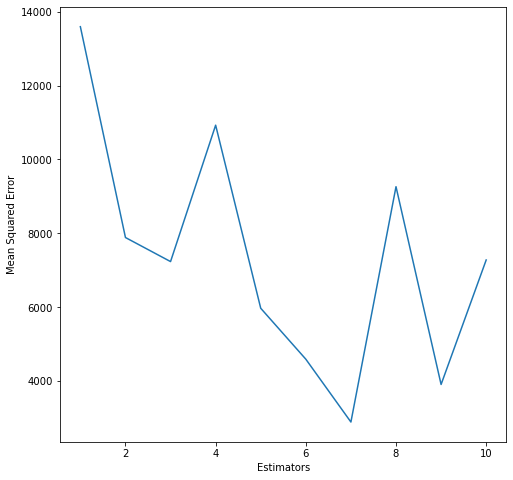

In [177]:
# Plot the chart of MSE versus number of estimators
plt.figure(figsize=(8, 8))
#plt.title('Effect of bagging as a function of estimators')
plt.plot(estimators, bagging_mse)#, 'b-', color="black", label='Bagging')
#plt.plot(estimators, rf_mse, 'b-', color="blue", label='Random Forest')
#plt.plot(estimators, boosting_mse, 'b-', color="red", label='AdaBoost')
#plt.legend(loc='upper right')
plt.xlabel('Estimators')
plt.ylabel('Mean Squared Error')
plt.show()

In [178]:
# Estimate the AdaBoost MSE over the full number
# of estimators, across a step size ("step_factor")
for i in range(0, axis_step):
    print("Boosting Estimator: %d of %d..." % (step_factor*(i+1), n_estimators))
    boosting = AdaBoostRegressor(DecisionTreeRegressor(),n_estimators=step_factor*(i+1),random_state=random_state,
    learning_rate=0.01
    )
    boosting.fit(X_train, Y_train.values.ravel())
    mse = mean_squared_error(Y_test, boosting.predict(X_test))
    estimators[i] = step_factor*(i+1)
    boosting_mse[i] = mse

Boosting Estimator: 1 of 10...
Boosting Estimator: 2 of 10...
Boosting Estimator: 3 of 10...
Boosting Estimator: 4 of 10...
Boosting Estimator: 5 of 10...
Boosting Estimator: 6 of 10...
Boosting Estimator: 7 of 10...
Boosting Estimator: 8 of 10...
Boosting Estimator: 9 of 10...
Boosting Estimator: 10 of 10...


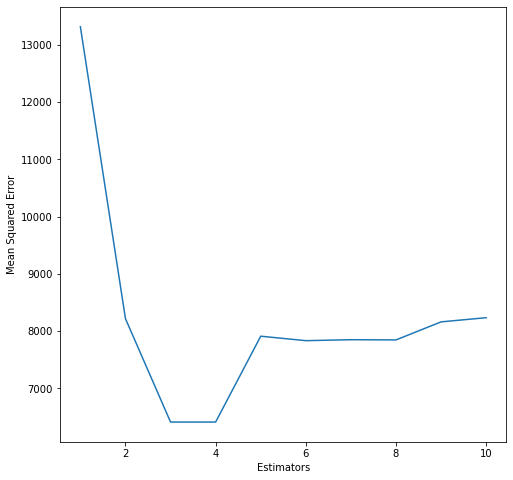

In [179]:
# Plot the chart of MSE versus number of estimators
plt.figure(figsize=(8, 8))
#plt.title('Effect of bagging as a function of estimators')
plt.plot(estimators, boosting_mse)#, 'b-', color="black", label='Bagging')
#plt.plot(estimators, rf_mse, 'b-', color="blue", label='Random Forest')
#plt.plot(estimators, boosting_mse, 'b-', color="red", label='AdaBoost')
#plt.legend(loc='upper right')
plt.xlabel('Estimators')
plt.ylabel('Mean Squared Error')
plt.show()